# 🎄🎄🎄 On a christmas market tour with geopandas 🎄🎄🎄

[Pandas](http://pandas.pydata.org/) is a very popular open source data analysis library for Python. The library [geopandas](http://geopandas.org/) extends the datatypes used by pandas to allow spatial operations on geospatial data. 

This notebook starts with a short overview on some basic pandas terms and methods, then explains the general concepts of spatial analysis and how they are implemented by geopandas. The second part of the notebook includes some christmas-themed code examples and exercises.
    

## 🎄 Basic concepts and terms

### pandas
---

- __Series__
    - A Series is a 1-dimensional labeled array that can contain any data type. The row labels are called _index_.
    - A Series can be created by calling `pandas.Series(data, index=index)`, passing a Python dict, an [ndarray](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) or a scalar value. The optional passed index is a list of axis labels. 
    - [pandas documentation on Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)



- __DataFrame__
    - DataFrames are the primary pandas data structure. They are 2-dimensional (table-like) and are basically a dict-like container for Series objects. Both axes _rows_ (0) and _columns_ (1) can be labelled (_column labels_ for columns, _index_ for rows).
    - A DataFrame can be constructed from a dictionary of 1-dimensional ndarrays / lists / dicts / Series objects, a 2-dimensional ndarray, a structured or record ndarray, a Series object or another DataFrame.
    - [pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)


- __DataFrame properties and methods__
    - `.columns`: Returns an Index object with the list of column labels.
    - `.shape`: Return a tuple representing the dimensionality of the DataFrame(number of rows/ number of columns).
    - `.loc[<label>]` and `.iloc[<n>]`: Selects an item by label (`.loc`) or position (`.iloc`).
    - `.head(n)`: Returns the first `n` rows of the DataFrame.
    - `.sort_values(by, axis=0, ascending=True, inplace=False)`: Returns the values of the given axis sorted by the specified axis item (specified by label or position).
    - `.drop(labels, axis=0, inplace=False')` - Removes the labels in the requested axis.
    - `.concat(df1, df2, axis=0)` - Concatenate pandas objects along the given axis.
    - `.apply(func, axis=0)`: applies a function along any axis of the dataframe. The objects passed to the function are Series objects with either the DataFrame’s index (`axis=0`) or the columns (`axis=1`) as index.


### Spatial analysis
---

Spatial analysis is all about examining the locations, attributes, and relationships of geographic features to address a question or gain useful knowledge. Spatial analysis extracts or creates new information from spatial data. A feature
can have a geographic location and other properties. Common types of geometries are _Point_, _LineString_ and _Polygon_.

- __Transforming features__
  - Existing features can be used to create new features, for example by applying a _buffer_, or _merging_ multiple features into one.


- __Topological relations__
  - Finding out how geographic features relate to each other is a major part of spatial analysis. The features can for example be _disjoint_, _equal_, _overlapping_ / _intersecting_; one feature can _contain_ the other or be _within_ the other feature.  
  - [more information on topological relations](http://www.gitta.info/SpatialQueries/en/html/TopoBasedOps_learningObject1.html)
  

- __Coordinate reference systems__ (CRS)
  - When dealing with geographic data, sooner or later you'll come across the topic of coordinate reference systems. With a CRS every place on the earth can be specified by a set of coordinates. CRS are divided into projected coordinate reference systems and geographic coordinate reference systems. [The EPSG code](http://spatialreference.org/) is commonly used to identify a CRS.
  - [more information on coordinate reference systems](http://docs.qgis.org/2.0/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)

  - Geographic CRS:
    - These use degrees of latitude and longitude and sometimes also a height value to describe a location on the earth’s surface. The most popular is called WGS84 (EPSG: 4326).
    - [more information on geographic CRS](http://help.arcgis.com/en/arcgisdesktop/10.0/help/index.html#/What_are_geographic_coordinate_systems/003r00000006000000/)
  - Projected CRS:
    - These are defined on a flat, two-dimensional surface. Unlike a geographic coordinate system, a projected coordinate system has constant lengths, angles, and areas across the two dimensions.
    - A very popular projected CRS is the Universal Transverse Mercator (UTM) CRS. It's a global map projection, but to avoid distortions it divides the world into 60 equal zones that are all 6 degrees wide in longitude from East to West, which makes calculations (distance / length / area) more accurate. [This page](www.latlong.net/lat-long-utm.html) helps to identify the UTM Zone and coordinates for a location.
    - [more information on projected CRS](http://help.arcgis.com/en/arcgisdesktop/10.0/help/index.html#/What_are_projected_coordinate_systems/003r0000000p000000/)


- __Storage formats__
  - A common data storage format for encoding a variety of geographic data structures is [GeoJSON](http://geojson.org/geojson-spec.html). You can use for example geojson.io to create or validate GeoJSON. 
  

- __Spatial analysis in Python__
  - There are several libraries that implement spatial data types and analysis functions in Python:
      - [Fiona](http://toblerity.org/fiona/manual.html) - reads and writes spatial data files
      - [Shapely](http://toblerity.org/shapely/manual.html) - manipulation and analysis of geometric objects
      - [geojson](https://pypi.python.org/pypi/geojson/) - Python bindings and utilities for GeoJSON
      - [pyproj](https://pypi.python.org/pypi/pyproj/1.9.5.1) - Performs cartographic transformations and geodetic computations.


### Geopandas
---

Geopandas combines the capabilities of pandas and Shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in Python that would otherwise require a spatial database such as PostGIS.

- __GeoSeries__
  - A GeoSeries is a Series of Shapely geometry objects. Supported are: Points / Multi-Points, Lines / Multi-Lines, Polygons / Multi-Polygons.
  - [geopandas documentation on GeoSeries](http://geopandas.org/data_structures.html#geoseries)


- __GeoDataFrame__
  - A GeoDataFrame is a DataFrame that always has one GeoSeries column which represents the GeoDataFrame‘s `geometry`. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the `geometry` column.
   - A GeoDataFrame can be constructed by reading spatial data from a file (`.read_file(<path>)`), passing a list of GeoJSON encoded features (`.from_features(<feature_list>)`) or expanding an existing DataFrame with a geometry column.
  - [geopandas documentation on GeoDataFrames](http://geopandas.org/data_structures.html#geodataframe)


- __Coordinate reference systems in geopandas__
    - A GeoDataFrame has a `crs` attribute which defines the coordinate system of the geometry. If the CRS is not specified in the input data or when creating the GeoDataFrame, it can be set by `gdf.crs = {'init' :'epsg:<code>'}`. 
    - Geopandas supports re-projecting data from one CRS to another by using the method `gdf.to_crs(epsg=<code>)`.
    
    
- __GeoDataFrame properties and methods__
  - `.area` - Shape area in units of the projection.
  - `.bounds` - Tuple of max and min coordinates on each axis for each shape.
  - `.total_bounds` - Tuple of max and min coordinates on each axis for entire GeoSeries.
  - `.geom_type` - Type of geometry.
  - `.is_valid` - Tests if coordinates make a shape that is a [reasonable geometric shape](http://www.opengeospatial.org/standards/sfa).
  - `.centroid` - Returns the [centroid](https://en.wikipedia.org/wiki/Centroid) of each shape as a GeoSeries.
  - `.unary_union()` - Return a geometry containing the union of all geometries in the GeoSeries.
  - `.buffer(<distance>)` - Creates a buffer on each feature, returns the new geometries as a a GeoSeries.
  - `.plot()` - Generates a plot of the geometries. Accepts a `cmap` argument (examples: `Accent`, `Blues`, `Pastel1`).
  - __Spatial relationships__: 
      - `geopandas.overlay(gdf1, gdf2, how=<overlay_method>)`
        - overlay methods: 
            - `intersection` - Returns only those geometries that are contained by both GeoDataFrames.
            - `symmetric_difference` - Returns geometries that are part of one GeoDataFrame but not of both.                       - `difference` - Returns geometries that are part of one gdf1 but are not contained in gdf2
            - `union` - Returns all geometries.
      - `.intersects(geom)` - Returns a Series of dtype('bool') with value True if the GeoDataFrame's geometry intersects in any way with the other geometry.
      - `.distance(geom)` - Returns a Series containing the minimum distance to the other GeoSeries (elementwise) or geometric object.
      - `.intersection(geom)` - Returns a GeoSeries of the intersection of each object with the other geometric object.
  - [Reference](http://geopandas.org/reference.html) to all attributes and methods
  

---

## 🎄 Code examples and exercises

### Setup
- Make sure you have installed the necessary requirements (Link).
- The first steps are to import `pandas` and `geopandas`, and to import and activate `matplotlib` for the data visualisation in this notebook.

In [2]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/Users/sabinekoch/projects/pyladies/geopandas/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Explore the christmas markets dataset
- The [christmas markets](https://github.com/sabinekoch/pyladies-geopandas/blob/master/data/christmas_markets.geojson) are stored as a GeoJSON. The original source is [here](https://daten.berlin.de/datensaetze/berliner-weihnachtsm%C3%A4rkte-0).

- We use geopandas' `.read_file()` method to load the data from the input file into a GeoDataFrame.
- The column `data` is a JSON column. We convert this column into multiple columns by using `.apply(pd.Series)` on it and add these new columns to the existing geodataframe. Then we drop all columns we won't need for the analysis.


___Tasks___:
- _Explore the dataset further - which columns does it have, which information is stored in the columns?_
- _Which columns hold the name and opening hours of the christmas markets?_
- _Try to sort the dataset by different columns_
- _Plot the dataset_

In [19]:
christmas_markets = gpd.read_file('data/christmas_markets.geojson')
christmas_markets = pd.concat([christmas_markets, christmas_markets['data'].apply(pd.Series)], axis=1)
christmas_markets.drop(['data', 'lat', 'lng', 'description', 'id'], axis=1, inplace=True)

christmas_markets.head(3)

,geometry,href,title,bemerkungen,bezirk,bis,email,name,oeffnungszeiten,plz_ort,strasse,veranstalter,von,w3
0,POINT (13.295946 52.519951),http://www.berlin.de/sen/wirtschaft/service/ma...,1,"zwischen Luisenplatz und Klausenerplatz, 24.12...",Charlottenburg-Wilmersdorf,2016-12-26,mailto:info@werbeteam-berlin.de,Weihnachtsmarkt vor dem Schloss Charlottenburg,Mo-Do 14:00-22:00\r\nFr-So 12:00-22:00\r\n25./...,14059 Berlin,Spandauer Damm 20 - 24,werbeteam berlin/Tommy Erbe\r\nTel.: 261 20 12...,2016-11-21,www.werbeteam-berlin.de
1,POINT (13.335511 52.504886),http://www.berlin.de/sen/wirtschaft/service/ma...,3,Eintritt frei\nWeitere Informationen auf der W...,Charlottenburg-Wilmersdorf,2017-01-01,mailto:info@svbev.de,33. Weihnachtsmarkt an der Gedächtniskirche,So-Do 11:00-21:00\r\nFr-Sa 11:00-22:00\r\n24.1...,10789 Berlin,Breitscheidplatz,Arbeitsgemeinschaft City e.V.\r\nBudapester St...,2016-11-21,www.agcity.de
2,POINT (13.305994 52.509313),http://www.berlin.de/sen/wirtschaft/service/ma...,5,Weitere Informationen auf der Webseite,Charlottenburg-Wilmersdorf,2016-12-29,mailto:lauenburger-pony@gmx.de,Weihnachtsmarkt in der Fußgängerzone Wilmersdo...,Mo-Fr 11:00-21:00\r\nSa 10:00-21:00\r\nSo 12:0...,10627 Berlin,Wilmersdorfer Straße,"Lauenburger, A., Tel.: 0163/495 77 62",2016-11-25,www.wilmersdorfer-arcaden.de


In [21]:
# Explore the dataset further - which columns does it have, which information is stored in the columns?
christmas_markets.columns

Index([       u'geometry',            u'href',           u'title',
           u'bemerkungen',          u'bezirk',             u'bis',
                 u'email',            u'name', u'oeffnungszeiten',
               u'plz_ort',         u'strasse',    u'veranstalter',
                   u'von',              u'w3'],
      dtype='object')

In [23]:
# Which columns hold the name and opening hours of the christmas markets? - 'oeffnungszeiten', 'name'

In [22]:
# Try to sort the dataset by different columns - sorted by column 'bezirk'
christmas_markets.sort_values('bezirk').head(5)

,geometry,href,title,bemerkungen,bezirk,bis,email,name,oeffnungszeiten,plz_ort,strasse,veranstalter,von,w3
0,POINT (13.295946 52.519951),http://www.berlin.de/sen/wirtschaft/service/ma...,1,"zwischen Luisenplatz und Klausenerplatz, 24.12...",Charlottenburg-Wilmersdorf,2016-12-26,mailto:info@werbeteam-berlin.de,Weihnachtsmarkt vor dem Schloss Charlottenburg,Mo-Do 14:00-22:00\r\nFr-So 12:00-22:00\r\n25./...,14059 Berlin,Spandauer Damm 20 - 24,werbeteam berlin/Tommy Erbe\r\nTel.: 261 20 12...,2016-11-21,www.werbeteam-berlin.de
10,POINT (13.295796 52.518946),http://www.berlin.de/sen/wirtschaft/service/ma...,21,,Charlottenburg-Wilmersdorf,2016-12-11,mailto:info@klausenerplatz.de,Kunsthandwerklicher Weihnachtsmarkt vor dem Br...,13:00-19:00,14059 Berlin,Schloßstr. 1/1 A,Kiezbündnis Klausenerplatz e.V.\r\nTel.: 30 82...,2016-12-11,www.klausenerplatz.de
8,POINT (13.30807 52.517122),http://www.berlin.de/sen/wirtschaft/service/ma...,17,,Charlottenburg-Wilmersdorf,2016-11-24,mailto:cw801003@charlottenburg-wilmersdorf.de,Nikolausmarkt der Beschäftigungs- und Bildungs...,11:00-14:00,10585 Berlin,Otto-Suhr-Allee 100,BA Charlottenburg-Wilmersdorf von Berlin\r\nAb...,2016-11-24,
7,POINT (13.27483 52.48543),http://www.berlin.de/sen/wirtschaft/service/ma...,15,Weitere Informationen auf der Webseite,Charlottenburg-Wilmersdorf,2016-11-27,mailto:weihnachtsmarkt@grunewaldgemeinde.de,Weihnachtsmarkt rund um die Grunewaldkirche,11:00-19:00,14193 Berlin,Bismarckallee 28 B,"Evangelische Kirchengemeinde Grunewald, Kontak...",2016-11-27,www.grunewaldgemeinde.de
6,POINT (13.31249 52.48809),http://www.berlin.de/sen/wirtschaft/service/ma...,13,,Charlottenburg-Wilmersdorf,2016-11-27,,Dänischer Weihnachtsmarkt,Sa 12:00-19:00\r\nSo 12:00-18:00,10713 Berlin,Brienner Str. 12,Dänische Gemeinde Berlin\r\nTel. und Fax: 873 ...,2016-11-26,www.christianskirken.de


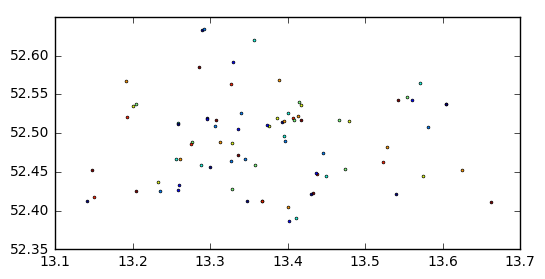

In [24]:
# Plot the dataset
christmas_markets.plot()

### Explore the districts dataset
- Now let's load the [districts](https://github.com/sabinekoch/pyladies-geopandas/blob/master/data/districts.geojson) into a GeoDataFrame and plot it.

___Tasks___:
- _Explore the dataset further - calculate for example the area or the centroids of the districts_
- _Convert the dataset to UTM (EPSG  and compare the plots_

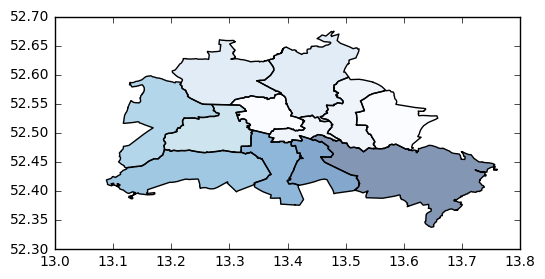

In [17]:
districts = gpd.read_file('data/districts.geojson')
districts.geometry.plot(cmap='Blues')

0     0.005227
1     0.002691
2     0.013677
3     0.008561
4     0.012165
5     0.013551
6     0.007021
7     0.005938
8     0.022159
9     0.008184
10    0.006903
11    0.011845
dtype: float64
0     POINT (13.36596423261029 52.53289373123935)
1     POINT (13.42833184626938 52.50388303618684)
2     POINT (13.44026497680094 52.59721478344532)
3     POINT (13.27022999114907 52.50104000373874)
4     POINT (13.17882110739165 52.52579761887874)
5      POINT (13.2390798748972 52.43484512119744)
6        POINT (13.3807659988846 52.441180331146)
7     POINT (13.45496635638041 52.44107834737282)
8     POINT (13.61120954783459 52.42958416416779)
9     POINT (13.57883188513433 52.52111999671829)
10    POINT (13.50976710053854 52.53491326695131)
11    POINT (13.29133970351733 52.59567978188738)
dtype: object


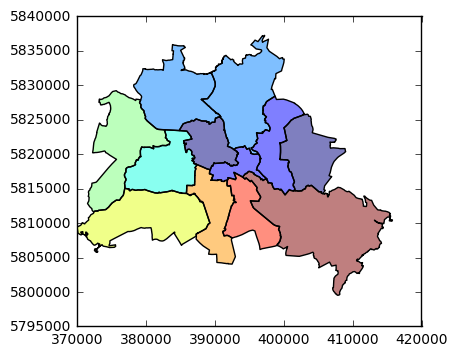

In [26]:
# Explore the dataset further - calculate for example the area or the centroids of the districts
print (districts.area)
print (districts.centroid)

# Convert the dataset to UTM (EPSG 32633) and compare the plots
districts.to_crs(epsg=32633, inplace=True)
districts.plot()

### Christmas markets by districts

- In the next step we want to count how many christmas markets there are per district.
- We apply a function that calculates the sum of all intersecting christmas markets per district. 
- Then we print the name of each districts and the `total_christmas_markets` that we just generated, sorted by `total_christmas_markets`

- _If you changed the CRS of the districts in the previous step, make sure to either convert it back to WGS84 (EPSG 4326) or also convert the christmas markets to UTM. You can check each GeoDataFrame's CRS with the `.crs` property_

In [28]:
districts.to_crs(epsg=4326, inplace=True)
districts['total_christmas_markets'] = districts.apply(
            lambda district: 
                    sum(christmas_markets.intersects(district.geometry)),
            axis=1)

districts[['Name', 'total_christmas_markets']].sort_values(by='total_christmas_markets', ascending=False)

,Name,total_christmas_markets
5,Steglitz-Zehlendorf,13
0,Mitte,11
3,Charlottenburg-Wilmersdorf,11
6,Tempelhof-Schöneberg,9
9,Marzahn-Hellersdorf,7
7,Neukölln,6
8,Treptow-Köpenick,6
11,Reinickendorf,6
4,Spandau,5
1,Friedrichshain-Kreuzberg,3


### Christmas markets by public transport stations

__Which public transport station has the most christmas markets in a distance less than 1000m?__

- First we load the [stops](https://github.com/sabinekoch/pyladies-geopandas/blob/master/data/stops.geojson) into a GeoDataFrame. 
- To create a 1000 m buffer, we need to reproject the dataset as it's currenty using latitude and longitude in degrees, not metric units. We convert the GeoDataFrame to UTM Zone 33N (EPSG 32633) (What happens if you don't change the CRS?).
- Then we replace the existing point geometry with the buffer geoemtry and plot the dataset.

___Task___:
- _Which public transport station has the most christmas markets close by?_


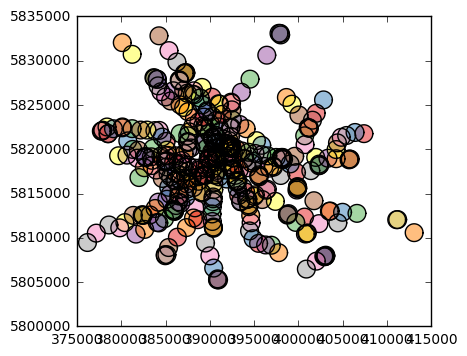

In [30]:
stops = gpd.read_file('data/stops.geojson')
stops.to_crs(epsg=32633, inplace=True)
stops.geometry = stops.buffer(distance=1000)
stops.geometry.plot()

In [35]:
# Which public transport station has the most christmas markets close by?
christmas_markets.to_crs(epsg=32633, inplace=True)
stops['christmas_markets_close_by'] = stops.apply(
            lambda stop: 
                    sum(christmas_markets.intersects(stop.geometry)),
            axis=1)

stops[['stop_name', 'christmas_markets_close_by']].sort_values(by='christmas_markets_close_by', ascending=False)

,stop_name,christmas_markets_close_by
268,S+U Alexanderplatz Bhf/Memhardstr. (Berlin),5
276,S+U Alexanderplatz (Berlin) [U2],5
264,S+U Alexanderplatz Bhf/Dircksenstr. (Berlin),5
247,U Alexanderplatz (Berlin) [Tram],5
265,S+U Brandenburger Tor (Berlin),5
266,S+U Alexanderplatz Bhf/Gontardstr. (Berlin),5
251,U Mohrenstr. (Berlin),5
244,S Hackescher Markt (Berlin),5
245,S+U Alexanderplatz Bhf (Berlin),5
277,S+U Alexanderplatz (Berlin) [U5],5


## 🎄 Final task

__Which are the closest christmas market to your home address and how far are they away?__

_Steps_:
- get the coordinates of your home and convert them to a GeoDataFrame
- Reproject it to UTM.
- Calculate the distance in km to your home address for each christmas market.
- Find the closest christmas markets and the distance to your home by sorting the dataset.



_Hints_:
- You can use for example geojson.io to get a point geometry in GeoJSON format
- The function `geopandas.from_features(data)` takes a list of GeoJSON features and returns a GeoDataFrame
- The function `gdf.distance(geom)` returns the distance of each shape in a GeoDataFrame to the given geometry

In [36]:
# get the coordinates of your home and convert them to a GeoDataFrame

address = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          13.515404462814331,
          52.45574787847177
        ]
      }
    }
  ]
}
home_df = gpd.GeoDataFrame.from_features(address['features'], crs= {'init' :'epsg:4326'})

# Reproject it to UTM.
home_df.to_crs(epsg=32633, inplace=True)
christmas_markets.to_crs(epsg=32633, inplace=True)

# Calculate the distance in km to your home address for each christmas market.
christmas_markets['distance_home'] = christmas_markets.apply(
            lambda christmas_market: (christmas_market.geometry.distance(home_df.iloc[0].geometry)/1000), axis=1)

# Find the closest christmas markets and the distance to your home by sorting the dataset.
print (christmas_markets[
        ['distance_home', 'name', 'von', 'bis', 'oeffnungszeiten']].sort_values(by='distance_home').head(10))

    distance_home                                               name  \
79       0.980608                 Lichtermarkt an der Christuskirche   
76       2.837923  Weihnachtsmarkt in den Späth'schen Baumschulen...   
15       3.126083  "Die Welt zuhause in Karlshorst" auf dem Johan...   
81       4.099884  7. Altglienicker Advents-Markt - Rund um die P...   
77       4.201075  Köpenick, die Weihnachtsinsel - Schlossinsel K...   
39       4.659636      Britzer Weihnachtsmarkt\nMarktplatz Britz Süd   
38       5.186196                  44. Alt-Rixdorfer Weihnachtsmarkt   
34       5.363701  Nordische Märchenweihnacht - Weihnachtsmarkt a...   
37       5.396730            Adventsmarkt an der Britzer Dorfkirche    
35       6.681115                      29. Alt-Buckower Adventsmarkt   

           von         bis                                    oeffnungszeiten  
79  2016-11-26  2016-11-26                                        14:00-18:00  
76  0000-00-00  0000-00-00                     

## Further reading/learning:
    
 - [General Introduction to pandas datastructures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)
 - [Teaching about and using coordinate systems](https://education.usgs.gov/lessons/coordinatesystems.pdf)
 - To speed up spatial operations, [spatial joins](http://geopandas.org/mergingdata.html#spatial-joins) together with a spatial index can be very useful.